## 1. Analisis Data Apps Android di Google Play Store
<p>Dengan perkembangan teknologi, banyak hal semakin mudah dilakukan dengan adanya 'komputer dalam genggaman', alias HP kita. Hal ini didukung dengan adanya berbagai aplikasi mobile yang tersedia di HP kita. Aplikasi mobile tersebut mudah dibuat dan bisa menguntungkan, lho! Karena dua faktor ini, aplikasi pun semakin luas dan banyak dikembangkan. Di pembahasan kali ini, kita akan melakukan analisis komprehensif dari pasar aplikasi Android dengan membandingkan lebih dari sepuluh ribu aplikasi di Google Play untuk berbagai kategori. Kita akan mengulik insights dari data yang tersedia untuk merancang strategi guna meningkatkan pertumbuhan  dan retensi dari aplikasi mobile.</p>

</br>
<p><img src="https://assets.datacamp.com/production/project_619/img/google_play_store.png" alt="Google Play logo" width=50%></p>
</br>

<p>Kali ini kita akan menggunakan dua dataset, yaitu:</p>
<ul>
<li><code>apps.csv</code>: berisi semua detail aplikasi di Google Play. Ada 13 fitur yang menggambarkan aplikasi yang diberikan.</li>
<li><code>user_reviews.csv</code>: berisi 100 ulasan untuk setiap aplikasi, yang paling membantu terlebih dahulu. Teks di setiap ulasan telah diproses sebelumnya dan dikaitkan dengan tiga fitur baru: Sentimen (Positif, Negatif, atau Netral), Polaritas Sentimen, dan Subjektivitas Sentimen.</li>
</ul>

In [14]:
# Membaca data di dataset
import pandas as pd
apps_with_duplicates = pd.read_csv('datasets/apps.csv')

# Menghilangkan duplicates (data berulang) dari apps_with_duplicates
apps = apps_with_duplicates.drop_duplicates()

# Mencetak jumlah banyaknya aplikasi
print('Banyak jumlah aplikasi pada dataset = ', apps.shape[0])

# Melihat 5 data acak dari keseluruhan populasi aplikasi
print(apps.sample(5))

Banyak jumlah aplikasi pada dataset =  9659
      Unnamed: 0                          App Category  Rating  Reviews  Size  \
8027        9147        Plants vs. Zombies™ 2   FAMILY     4.4   567632  15.0   
8697        9847  Hornet - Gay Social Network   SOCIAL     4.0   163679   NaN   
4180        5131                  Freeland AH  MEDICAL     NaN        0  28.0   
1388        1686             Bubble Shooter 2     GAME     4.3    23005   NaN   
1526        1931               Dude Perfect 2     GAME     4.5   401425  70.0   

         Installs  Type Price Content Rating   Genres       Last Updated  \
8027  10,000,000+  Free     0   Everyone 10+   Casual      June 12, 2018   
8697   5,000,000+  Free     0     Mature 17+   Social     August 1, 2018   
4180         100+  Free     0       Everyone  Medical  December 18, 2017   
1388   5,000,000+  Free     0       Everyone   Arcade      July 25, 2018   
1526  10,000,000+  Free     0       Everyone   Action     April 12, 2017   

            

## 2. Data cleaning

In [15]:
# List karakter yang harus dihilangkan (remove)
chars_to_remove = ['+', ',', '$']
# List nama kolom yang harus dibersihkan dari karakter di atas
cols_to_clean = ['Installs', 'Price']

# Loop untuk tiap kolom di cols_to_clean
for col in cols_to_clean:
    # Loop untuk tiap karakter chars_to_remove
    for char in chars_to_remove:
        # Mengganti karakter dari list di atas dengan string kosong -> ('')
        apps[col] = apps[col].apply(lambda x: x.replace(char, ''))
        
# Mencetak informasi dari dataframe 'apps'
print(apps.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   object 
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 754.6+ KB
None


## 3. Benerin tipe data (data types)

In [16]:
# Mengganti tipe data Installs menjadi float
apps['Installs'] = apps['Installs'].astype(float)

# Mengganti tipe data Price  menjadi float
apps['Price'] = apps['Price'].astype(float)

# Mengecek dtype (tipe data) dari dataframe 'apps'
print(apps.dtypes)

Unnamed: 0          int64
App                object
Category           object
Rating            float64
Reviews             int64
Size              float64
Installs          float64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object


## 4. Mengeksplor Kategori dari Aplikasi

In [17]:
# Install chart-studio
!pip install chart-studio

In [115]:
# Import library chart_studio dan plotly untuk membuat grafik interaktif
import chart_studio.plotly as py
import chart_studio.tools as tls
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

# Mencetak jumlah total kategori unik
num_categories = apps['Category'].unique().shape[0]
print('Jumlah kategori = ', num_categories)

# Menghitung jumlah aplikasi pada tiap 'Category'. 
num_apps_in_category = apps['Category'].value_counts()

# Mengurutkan (Sort) num_apps_in_category dengan urutan terbalik (descending) berdasarkan jumlah aplikasi pada tiap kategori
sorted_num_apps_in_category = num_apps_in_category.sort_values(ascending=False)

# Membuat bar plot
data = [go.Bar(
        x = num_apps_in_category.index, # index = nama kategori
        y = num_apps_in_category.values # value = jumlah per kategori
)]

layout = {'title': { 
              'text' : 'Jumlah Aplikasi per Kategori',
              'y' : 0.9,
              'x' : 0.5,
              'xanchor': 'center',
              'yanchor': 'top'
          }}

# Menyimpan plot grafik interaktif
plotly.offline.iplot(data)
py.plot({'data': data, 'layout': layout}, filename="apps_jumlah_kategori", auto_open = True)

Jumlah kategori =  33


'https://plotly.com/~nailafadhilah/8/'

## 5. Melihat Distribusi Rating Aplikasi

In [31]:
# Menghitung rata-rata rating dari aplikasi
avg_app_rating = apps['Rating'].mean()
print('Rata-rata rating aplikasi = ', avg_app_rating)

# Mendistribusikan aplikasi sesuai dengan ratingnya
data = [go.Histogram(
        x = apps['Rating'])]

# Mencetak penanda titik rata-rata pada plot dan menambahkan judul
layout = {'shapes': [{
              'type' :'line',
              'x0': avg_app_rating,
              'y0': 0,
              'x1': avg_app_rating,
              'y1': 1000,
              'line': { 'dash': 'dashdot'}
          }],
          'title': { 
              'text' : 'Distribusi Rating Aplikasi',
              'y':0.9,
              'x':0.5,
              'xanchor': 'center',
              'yanchor': 'top'
          }
          }

# Menyimpan hasil plot yang dibuat
plotly.offline.iplot({'data': data, 'layout': layout})
py.plot({'data': data, 'layout': layout}, filename="apps_distribusi_rating", auto_open = True)

Rata-rata rating aplikasi =  4.173243045387998


'https://plotly.com/~nailafadhilah/3/'

## 6. Size (Besar) dan Price (Harga) dari Aplikasi

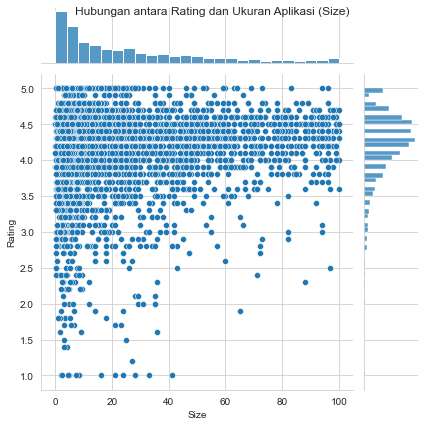

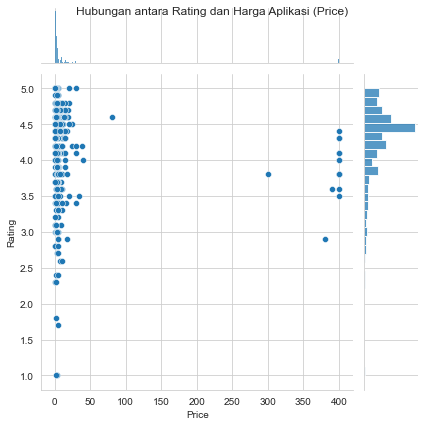

In [99]:
# Import library seaborn
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings("ignore")

# Menyeleksi baris-baris dimana 'Rating' dan 'Size' memiliki nilai (keduanya not null)
apps_with_size_and_rating_present = apps[apps.Rating.notnull() & apps.Size.notnull()]

# Subset (Potong) untuk kategori dengan jumlah aplikasi setidaknya 250 apps
large_categories = apps_with_size_and_rating_present.groupby('Category').filter(lambda x: len(x) >= 250)

# Membuat plot size vs. rating
plt1 = sns.jointplot(data = large_categories, x = 'Size', y = 'Rating')
plt1.fig.suptitle('Hubungan antara Rating dan Ukuran Aplikasi (Size)')

# Memilih aplikasi dimana 'Type' nya adalah 'Paid'
paid_apps = apps_with_size_and_rating_present[apps_with_size_and_rating_present['Type'] == 'Paid']

# Membuat plot price vs. rating
plt2 = sns.jointplot(data = paid_apps, x = 'Price', y = 'Rating')
plt2.fig.suptitle('Hubungan antara Rating dan Harga Aplikasi (Price)')

# Menyimpan hasil plot yang dibuat
plt1.savefig('Hubungan_Rating_Size.png')
plt2.savefig('Hubungan_Rating_Price.png')

## 7. Korelasi antara Kategori dan Harga dari Aplikasi

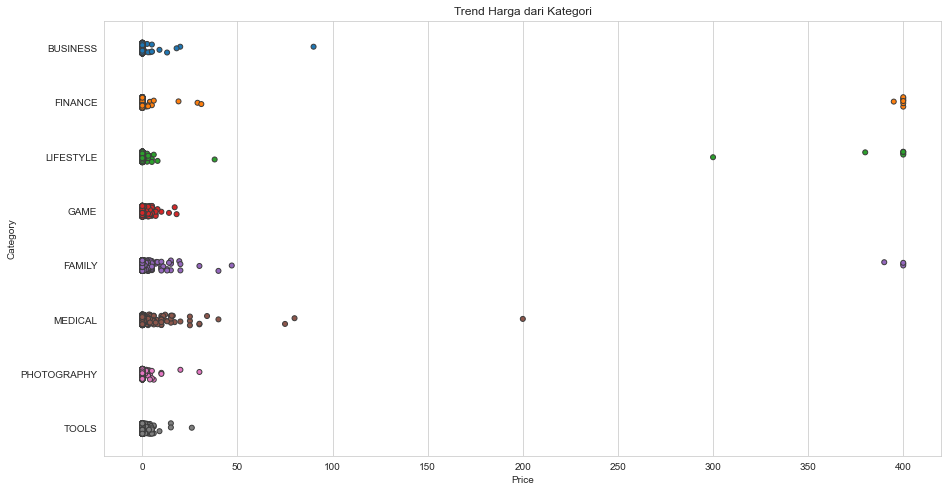

In [42]:
# Import library matplotlib untuk membuat plot
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Memilih beberapa kategori aplikasi yang populer
popular_app_cats = apps[apps.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY',
                                            'MEDICAL', 'TOOLS', 'FINANCE',
                                            'LIFESTYLE','BUSINESS'])]

# Melihat trend dari harga dengan plot Price vs Category
ax = sns.stripplot(x = popular_app_cats['Price'], y = popular_app_cats['Category'], jitter=True, linewidth=1)
ax.set_title('Trend Harga dari Kategori')

# Aplikasi dengan harga di atas $200
apps_above_200 = apps[apps['Price']>200]
apps_above_200[['Category', 'App', 'Price']]

# Menyimpan grafik
plt.savefig('Trend_Harga_Kategori.png')

## 8. Menghilangkan aplikasi "junk"

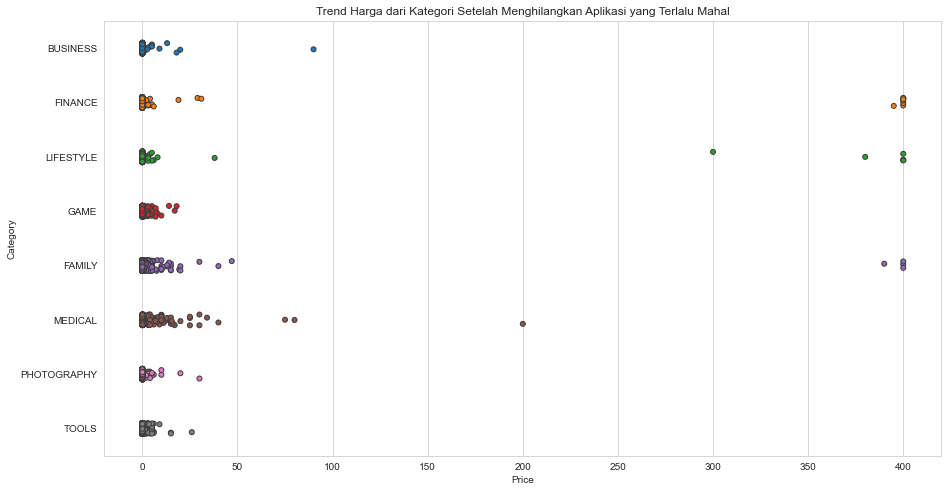

In [43]:
# Memilih aplikasi dengan harga di bawah $100 (Harga logis)
apps_under_100 = popular_app_cats[popular_app_cats['Price']<100]

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Melihat trend harga dari Aplikasi Otentik (apps_under_100)
ax = sns.stripplot(x = 'Price', y = 'Category', data = popular_app_cats, jitter = True, linewidth = 1)
ax.set_title('Trend Harga dari Kategori Setelah Menghilangkan Aplikasi yang Terlalu Mahal')

# Menyimpan grafik
plt.savefig('Trend_Harga_Kategori_Otentik.png')

## 9. Popularitas Aplikasi Gratis (Free) vs. Aplikasi Berbayar (Paid)

In [61]:
# Membuat box plot untuk membandingkan jumlah unduhan aplikasi berbayar vs. gratos
trace0 = go.Box(
    # Data untuk aplikasi berbayar (Paid)
    y = apps[apps['Type'] == 'Paid']['Installs'],
    name = 'Paid'
)

trace1 = go.Box(
    # Data untuk aplikasi yang gratis (Free)
    y = apps[apps['Type'] == 'Free']['Installs'],
    name = 'Free'
)

layout = go.Layout(
    title = "Jumlah unduh dari aplikasi berbayar (paid) vs. aplikasi gratis (free)",
    yaxis = dict(title = "Log jumlah unduh",
                type = 'log',
                autorange = True)
)

# Menambahkan trace0 dan trace1 ke dalam sebuah list untuk plotting
data = [trace0, trace1]

# Menyimpan grafik
plotly.offline.iplot({'data': data, 'layout': layout})
py.plot({'data': data, 'layout': layout}, filename="apps_popularitas_bayar_vs_gratis", auto_open = True)

'https://plotly.com/~nailafadhilah/11/'

## 10. Analisis Sentimen Singkat dari Ulasan (Review) Pengguna

In [60]:
# Memindahkan user_reviews.csv ke dataframe
reviews_df = pd.read_csv('datasets/user_reviews.csv')

# Menyatukan kedua dataframe (apps dan dataframe yang baru di-load)
merged_df = pd.merge(apps, reviews_df)

# Mengeluarkan kolom dengan value NA (tidak ada) dari kolom Sentiment dan Review
merged_df = merged_df.dropna(subset = ['Sentiment', 'Review'])

trace0 = go.Box(
    # Data untuk aplikasi berbayar (Paid)
    y = merged_df[merged_df['Type'] == 'Paid']['Sentiment_Polarity'],
    name = 'Paid'
)

trace1 = go.Box(
    # Data untuk aplikasi yang gratis (Free)
    y = merged_df[merged_df['Type'] == 'Free']['Sentiment_Polarity'],
    name = 'Free'
)

layout = go.Layout(
    title = "Distribusi Polaritas Sentimen"
)

data = [trace0, trace1]

# Menambahkan trace0 dan trace1 ke dalam sebuah list untuk plotting
plotly.offline.iplot({'data': data, 'layout': layout})
py.plot({'data': data, 'layout': layout}, filename="apps_distribusi_sentimen", auto_open = True)


'https://plotly.com/~nailafadhilah/13/'